# Time Series

_Excercise and information from: https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/_

A time series is a sequence of data, observations or values, measured at certain times and arranged chronologically. The data may be spaced at equal or unequal intervals.

# Stationary time series

A time series is said to be strictly stationary if its properties are not affected by the changes over time. That is to say, that three basic criteria should be met in order to consider a series of time as stationary:
 - The average of the series should not be a function of time
 - The variance of the series should not be a function of time
 - The covariance of the series should not be a function of time

The reason why these series are important is that most time series models work under the assumption that the series is stationary. Intuitively, we can assume that if a series has a particular behavior over time, there is a very high probability that behavior will continue in the future.

Although the assumption that the series is stationary is used in many models, almost none of the time series that we find in practice are stationary. For this reason the statistic had to develop several techniques to make stationary, or as close as possible to stationary, to a series.

# Main Python libraries for Time Series

The main libraries that Python offers us to work with time series are:

 - **Statsmodels:** This library contains many objects and functions of great utility for the analysis of time series. Some of the models that are covered by Statsmodels include: the autoregressive model (AR); the autoregressive vector model (VAR); and the autoregressive model of moving average (ARMA). It also includes functions of descriptive statistics of time series, such as autocorrelation, as well as the corresponding theoretical properties of ARMA or related processes. Finally, it also offers the related statistical tests and some useful auxiliary functions.

 - **Pandas:** Pandas provides extensive support for working with time series data. Generally when we work with time series we perform a wide range of tasks, such as: convert dates, standardize time according to the time zone, create sequences at certain intervals or frequencies, identify missing data, move the dates backwards or forwards by a certain value, calculate aggregate summaries of values as time changes, etc. Pandas gives us the tools to perform these and many other tasks in a very simple way.

# Time Series Example

In this case, let's play around with this year's Weatherford (WFT) share price information.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [27]:
wft.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22',
               '2016-09-23', '2016-09-26', '2016-09-27', '2016-09-28',
               '2016-09-29', '2016-09-30'],
              dtype='datetime64[ns]', name='Date', length=189, freq=None)

## Read Data

In [2]:
wft = web.DataReader("WFT", 'yahoo', '2016-1-1', '2016-9-30')

In [3]:
wft.head()

High   Low  Open  Close    Volume  Adj Close
Date                                                    
2016-01-04  8.70  8.29  8.40   8.64  10719400       8.64
2016-01-05  8.80  8.13  8.67   8.26   9109100       8.26
2016-01-06  8.16  7.84  7.94   7.91  13203200       7.91
2016-01-07  7.83  7.34  7.69   7.34  12633800       7.34
2016-01-08  7.55  6.86  7.48   6.97  18547500       6.97

## Time Series frequent actions

Common functions applied to time series

### Filter data between two dates

In [4]:
wft['2016-02-04':'2016-02-08']

High   Low  Open  Close    Volume  Adj Close
Date                                                    
2016-02-04  7.82  6.99  7.10   7.39  34379100       7.39
2016-02-05  7.52  6.87  7.37   6.94  27775700       6.94
2016-02-08  6.79  6.41  6.68   6.74  17611300       6.74

### Values from one date

In [5]:
wft.loc['2016-2-16']

High                6.74
Low                 6.33
Open                6.66
Close               6.62
Volume       11453500.00
Adj Close           6.62
Name: 2016-02-16 00:00:00, dtype: float64

In [6]:
wft['Adj Close']['2016-2-16']

6.619999885559082

### Values from 1 month

In [7]:
wft['2016-2'].head()

High   Low  Open  Close    Volume  Adj Close
Date                                                    
2016-02-01  6.67  5.90  6.51   6.33  36665900       6.33
2016-02-02  6.16  5.82  6.12   5.97  21091100       5.97
2016-02-03  6.40  5.60  6.04   6.27  24870400       6.27
2016-02-04  7.82  6.99  7.10   7.39  34379100       7.39
2016-02-05  7.52  6.87  7.37   6.94  27775700       6.94

### Values at the end of each month

In [8]:
wft.asfreq('M', method='ffill').head()

High   Low  Open  Close    Volume  Adj Close
Date                                                    
2016-01-31  6.77  6.20  6.26   6.74  17661000       6.74
2016-02-29  6.62  6.33  6.43   6.40  14120300       6.40
2016-03-31  7.86  7.55  7.62   7.78  13224600       7.78
2016-04-30  8.34  7.88  8.10   8.13  21137000       8.13
2016-05-31  5.74  5.55  5.61   5.61   8481400       5.61

### Values at the end of each month (working days)

In [9]:
wft.asfreq('BM').head()

High   Low  Open  Close    Volume  Adj Close
Date                                                    
2016-01-29  6.77  6.20  6.26   6.74  17661000       6.74
2016-02-29  6.62  6.33  6.43   6.40  14120300       6.40
2016-03-31  7.86  7.55  7.62   7.78  13224600       7.78
2016-04-29  8.34  7.88  8.10   8.13  21137000       8.13
2016-05-31  5.74  5.55  5.61   5.61   8481400       5.61

### Values at the end of each quarter

In [10]:
wft.asfreq('BQ')

High   Low  Open  Close    Volume  Adj Close
Date                                                    
2016-03-31  7.86  7.55  7.62   7.78  13224600       7.78
2016-06-30  5.58  5.36  5.50   5.55  14896000       5.55
2016-09-30  5.80  5.61  5.75   5.62  23253300       5.62

### Moving the values of the series

In time series, is important to analize lags, in other words, to analize if there are correleations between the time series and the time series with some periods of lags.

1 day lag example, with _shift_ function of _pandas_

In [11]:
desplazado = wft['Adj Close'].shift(1)

In [12]:
desplazado.head()

Date
2016-01-04     NaN
2016-01-05    8.64
2016-01-06    8.26
2016-01-07    7.91
2016-01-08    7.34
Name: Adj Close, dtype: float64

### Daily percentage variation

In [13]:
variacion_diaria = wft['Adj Close'] / wft['Adj Close'].shift(1) - 1
wft['var_diaria'] = variacion_diaria
variacion_diaria.head()

Date
2016-01-04         NaN
2016-01-05   -0.043981
2016-01-06   -0.042373
2016-01-07   -0.072061
2016-01-08   -0.050409
Name: Adj Close, dtype: float64

In [14]:
wft['Adj Close'].pct_change().head()

Date
2016-01-04         NaN
2016-01-05   -0.043981
2016-01-06   -0.042373
2016-01-07   -0.072061
2016-01-08   -0.050409
Name: Adj Close, dtype: float64

### Cumulative Day percentage variation

In [15]:
(1 + wft['Adj Close'].pct_change()).cumprod().head()

Date
2016-01-04         NaN
2016-01-05    0.956019
2016-01-06    0.915509
2016-01-07    0.849537
2016-01-08    0.806713
Name: Adj Close, dtype: float64

### Time Series Visualization

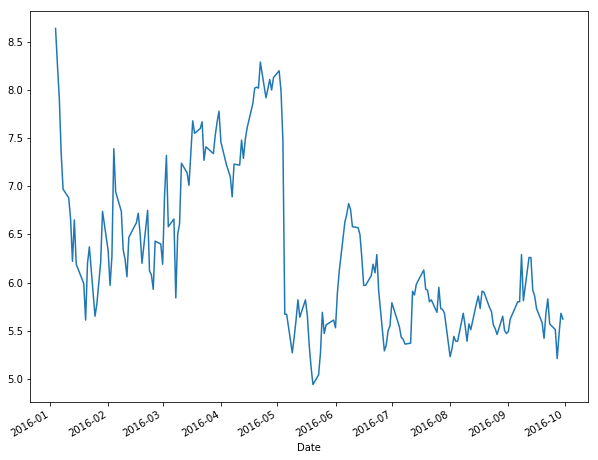

In [16]:
plot = wft['Adj Close'].plot(figsize=(10, 8))

### Trend and cyclic component separation

Separate _trend_ and _cyclic component_ with **Hodrick-Prescott** filter

In [17]:
wft_ciclo, wft_tend = sm.tsa.filters.hpfilter(wft['Adj Close'])
wft['tend'] = wft_tend

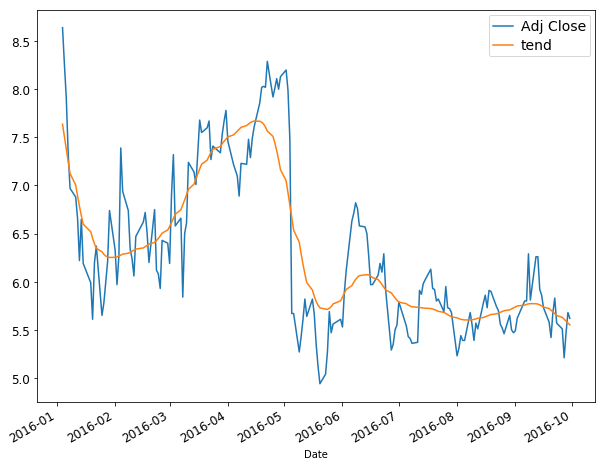

In [18]:
wft[['Adj Close', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

### Daily percentage variation plot

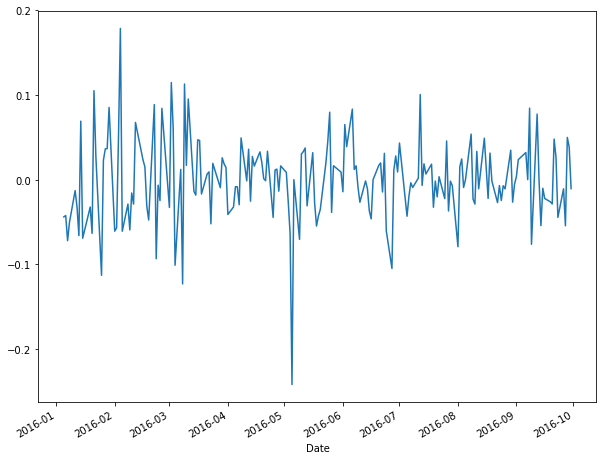

In [19]:
plot = wft['var_diaria'].plot(figsize=(10, 8))

### Moving Averages

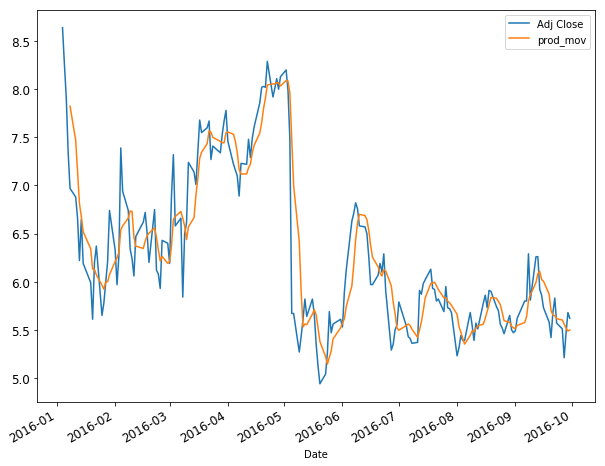

In [20]:
wft_ma = wft['Adj Close'].rolling(5).mean()
wft['prod_mov'] = wft_ma
plot = wft[['Adj Close', 'prod_mov']].plot(figsize=(10, 8), fontsize=12)

### Separation - Residual, Seasonal, Trend, Observed

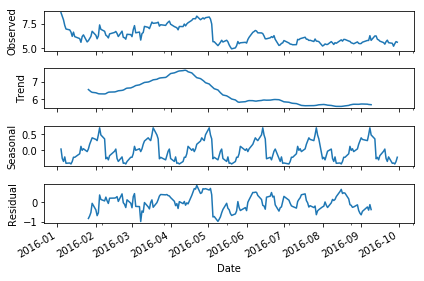

In [21]:
descomposicion = sm.tsa.seasonal_decompose(wft['Adj Close'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()

### ARIMA - Close value

Attempt of ARIMA with this non stationary data

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind

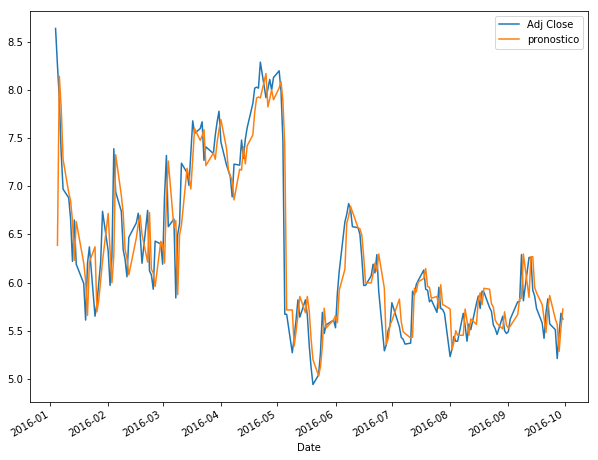

In [22]:
modelo = sm.tsa.ARIMA(wft['Adj Close'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
wft['pronostico'] = resultados.fittedvalues  
plot = wft[['Adj Close', 'pronostico']].plot(figsize=(10, 8))  

### ARIMA - Daily Variation

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


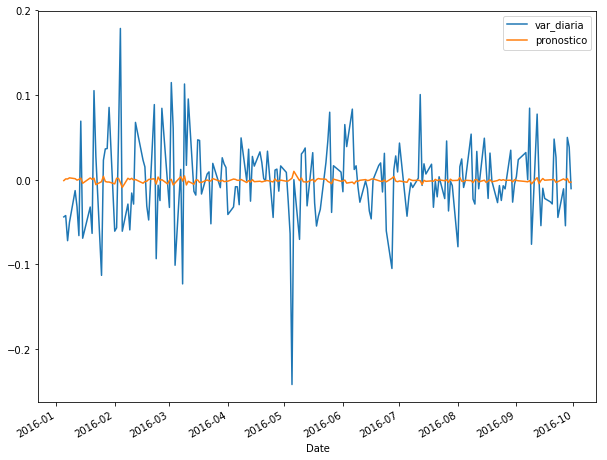

In [23]:
modelo = sm.tsa.ARIMA(wft['var_diaria'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
wft['pronostico'] = resultados.fittedvalues  
plot = wft[['var_diaria', 'pronostico']].plot(figsize=(10, 8)) 